In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read the City Data and Ride Data
city = pd.read_csv("data/city_data.csv")
ride = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
# Display the data table for preview
merged = pd.merge(ride, city, on="city", how ="left")
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
#Key Variables total determine for plotting 
# Average fare per City 
city_fare=merged.groupby("city")["fare"].mean()

# Total number of rides per city 
city_rides=merged.groupby("city")["ride_id"].count()

# Total number of drivers per city 
city_drivers=merged.groupby("city")["driver_count"].first()

# City Types
city_type=merged.groupby("city")["type"].first()

city_summary=pd.DataFrame({"Average Fare":city_fare,
                           "Total Riders": city_rides,
                          "Total Drivers": city_drivers, 
                          "City Type":city_type})
city_summary.head()

,Average Fare,Total Riders,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [4]:
# for each of the three city types
Urban = city_summary.loc[city_summary["City Type"]=="Urban"]
Suburban = city_summary.loc[city_summary["City Type"]=="Suburban"]
Rural = city_summary.loc[city_summary["City Type"]=="Rural"]

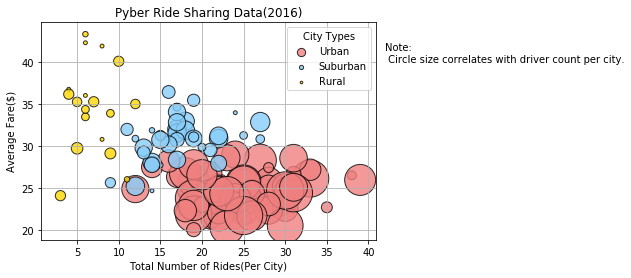

In [5]:
# Build the scatter plots for each city types
plt.scatter(Urban["Total Riders"],Urban["Average Fare"],s = Urban["Total Drivers"]*20, marker="o",color ="LightCoral", edgecolors="black", alpha =0.8, label = "Urban")
plt.scatter(Suburban["Total Riders"],Suburban["Average Fare"],s = Suburban["Total Drivers"]*15, marker="o",color ="LightSkyBlue", edgecolors="black", alpha =0.8, label = "Suburban")
plt.scatter(Rural["Total Riders"],Rural["Average Fare"],s = Rural["Total Drivers"]*15, marker="o",color ="Gold", edgecolors="black",alpha =0.8, label = "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(title="City Types", loc = "upper right", markerscale=0.3)

# Incorporate a text label regarding circle size
plt.text(42,40,"Note:\n Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber_Ride_Sharing_Data.png")

# Show plot
plt.show()

## Total Fares by City Type

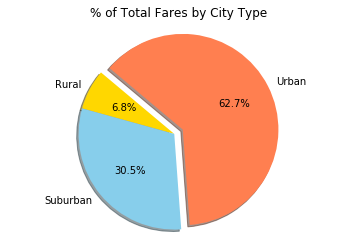

In [6]:
# Calculate Type Percents
total_fare = merged["fare"].sum()
fare_type = merged.groupby("type")["fare"].sum()
percent_fare_type =  (fare_type/total_fare)*100

# Build Pie Chart
labels=["Rural", "Suburban","Urban"]
sizes= percent_fare_type
colors=["Gold","SkyBlue","Coral"]
explode=(0,0,0.10)

fare_plt= plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                 autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/Pyber_Fares_piechart.png")
plt.show()

## Total Rides by City Type

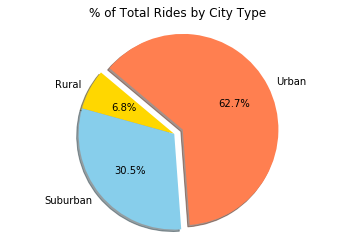

In [7]:
# Calculate Ride Percents
total_rides = merged["ride_id"].count()
ride_type = merged.groupby("type")["ride_id"].count()
percent_ride_type = (ride_type/total_rides)*100

# Build Pie Chart
labels=["Rural", "Suburban","Urban"]
sizes= percent_fare_type
colors=["Gold","SkyBlue","Coral"]
explode=(0,0,0.10)

fare_plt= plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                 autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/Pyber_rides_piechart.png")
plt.show()

## Total Drivers by City Type

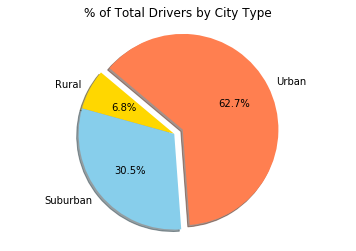

In [8]:
# Calculate Driver Percents
total_drivers = city_summary["Total Drivers"].sum()
drivers_type = city_summary.groupby("City Type")["Total Drivers"].sum()
percent_drivers_type = (drivers_type/total_drivers)*100

# Build Pie Chart
labels=["Rural", "Suburban","Urban"]
sizes= percent_fare_type
colors=["Gold","SkyBlue","Coral"]
explode=(0,0,0.10)

fare_plt= plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                 autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/Pyber_drivers_piechart.png")
plt.show()